#  Gaussian Process

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## Generate data 

In [2]:
# Generate data
M = 3

# X = np.linspace(0, 10, num=M)
X = np.array([5, 14, 19], dtype=np.float)
t_real = np.sin(X)
t = t_real + np.random.randn(M) * 0.25


def kernel(x1, x2, var=1):
    # 1D Gaussian kernel
    return np.exp(-(x1 - x2)**2 / (2*var))


def gaussian_kernel(x):
    phi = kernel(x, X)
    return phi

## Design matrix 

In [3]:
# Design matrix
Phi = np.zeros([M, M])

for i, x in enumerate(X):
    Phi[i] = gaussian_kernel(x)

## Gaussian Process Prior 

In [4]:
# Gaussian process prior
# ----------------------
# Assume prior p(w) = N(w | 0, alpha*I), alpha := variance

# Precisions, hyperparameters
alpha = 2  # for p(w), the prior
beta = 2  # for p(t|y), the noisy observation

y_mean = np.zeros(M)
y_cov = 1/alpha * Phi @ Phi.T  # Gram matrix
K = y_cov
p_y = st.multivariate_normal(mean=y_mean, cov=y_cov, allow_singular=True)

# with noise
t_mean = np.zeros(M)
t_cov = y_cov + 1/beta*np.eye(M)
C = t_cov
p_t = st.multivariate_normal(mean=y_mean, cov=t_cov, allow_singular=True)


## Predictive Distribution


In [5]:
N = 100  # num of data points to predict
X_prime = np.linspace(0, 20, num=N)

# Kernel matrix of X_prime and observation X
K_ = np.zeros([N, M])
for i, x in enumerate(X_prime):
    K_[i] = gaussian_kernel(x)
K_ = K_.T  # K_: MxN

### Gram matrix for X_prime

In [6]:
# Gram matrix of X_prime
K__ = np.zeros([N, N])
for i, x in enumerate(X_prime):
    K__[i] = kernel(x, X_prime)

### Posterior parameters

In [7]:
tmp = K_.T @ np.linalg.inv(C)

mean = tmp @ t
cov = K__ - tmp @ K_

### Posterior for gaussian process 

In [8]:
GP_post = st.multivariate_normal(mean=mean, cov=cov, allow_singular=True)

### Sample from posterior 

In [9]:
y_samples = GP_post.rvs(500)

y_mean = np.mean(y_samples, axis=0)
y_std = np.std(y_samples, axis=0)

### Visualize 

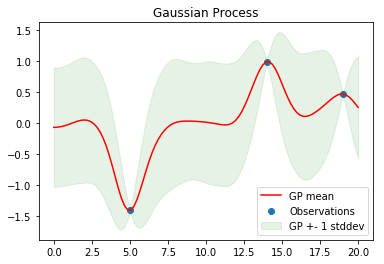

In [10]:
plt.title('Gaussian Process')
plt.scatter(X, t, label='Observations')
plt.plot(X_prime, y_mean, color='red', label='GP mean')
plt.fill_between(
    X_prime, y_mean-y_std, y_mean+y_std,
    interpolate=True, color='green', alpha=0.1, label='GP +- 1 stddev'
)
plt.legend(loc='lower right')
plt.show()